**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ipywidgets import interactive, fixed
from scipy import optimize
import math

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

# Step 1: Creating symbols for the relevant variables for sympy
w = sm.symbols('w')
tau = sm.symbols('tau')
G = sm.symbols('G')
C = sm.symbols('C')
alpha = sm.symbols('alpha')
v = sm.symbols('v')
L = sm.symbols('L')
kappa = sm.symbols('kappa')
w_tilde = sm.symbols('w_tilde')

# Step 2: Creating the optimizer 

utility_func = sm.log(C**(alpha) * G**(1 - alpha)) - v * ((L**2)/2)


# Step 3: Creating constraints

C_con = kappa + (1 - tau) * w * L

w_con = (w_tilde/(1 - tau))

# Substitute for C 

utility_func_sub_1 = utility_func.subs(C, C_con)


# Substitute for w

utility_func_subs = utility_func_sub_1.subs(w, w_con)
utility_func_subs

# FOC

foc = sm.diff(utility_func_subs, L)

# Simplify the FOC
simplified_foc = sm.cancel(foc)



# solve FOC

sol = sm.solve(sm.Eq(simplified_foc, 0), L)
sol[0]

sol_print = sm.Eq(L, sol[0])
display(sol_print)

Eq(L, (-kappa*v - sqrt(v*(4*alpha*w_tilde**2 + kappa**2*v)))/(2*v*w_tilde))

We get the same optimallabor supply choice. For our result v is not being simplified but if it would be simplified we would get this solution $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

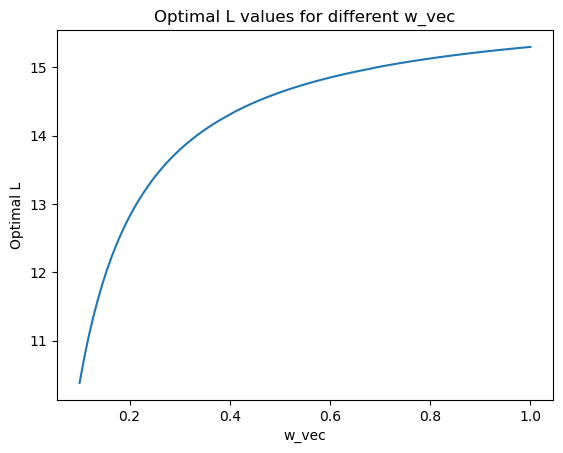

In [3]:
# write your code here

# The baseline parameters
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16 ** 2)
w = 1.0
w_vec = np.linspace(0.1, 1, 100)
tau = 0.3
G = 1.5




# Create the Utility function
def utility_func(L, alpha, kappa, tau, w, G, v):
   utility = math.log(((kappa + (1 - tau) * w * L) ** alpha) * (G ** (1 - alpha)))
   disutility = -v * (L ** 2 / 2)
   return utility + disutility


# Define Objective Function
def objective_1(L):
   return -utility_func(L, alpha, kappa, tau, w, G, v)


# Define the bounds for L
bounds = [(0, 24)]  # L should be non-negative


# Initialize a list to store optimal L values
optimal_L_values = []


# Solve the optimization problem for each w in w_vec
for w in w_vec:
   # Solve the optimization problem
   result = minimize(objective_1, x0=[0], bounds=bounds)
  
   # Extract the optimal solution
   optimal_L = result.x[0]
  
   # Store the optimal L value
   optimal_L_values.append(optimal_L)


# Create a plot
plt.plot(w_vec, optimal_L_values)
plt.xlabel('w_vec')
plt.ylabel('Optimal L')
plt.title('Optimal L values for different w_vec')
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/md/f63666552dn2qx3rt3fk54_w0000gn/T/ipykernel_4871/521096311.py:19: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**(alpha) * G_star**(1 - alpha)) - v * ((L_star**2) / 2)


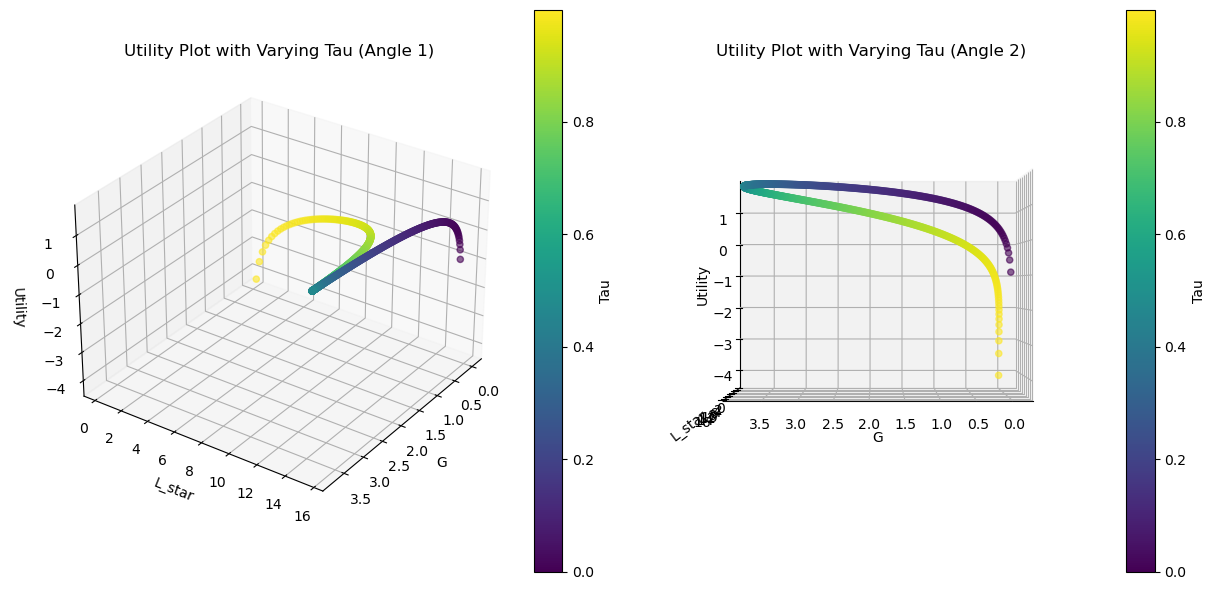

In [24]:
# write your code here
# define the parameters 
alpha = 0.5
kappa = 1.0
v = 1/(2 * (16**2))
w = 1.0


tau_values = np.linspace(0, 1, 1000, endpoint=False)  # Generate 100 equally spaced tau values between 0 and 1

L_star_values = []
G_star_values = []
utility_values = []
tau_color_values = []  # Store tau values for color mapping

for tau in tau_values:
    L_star = ((-kappa + np.sqrt(kappa**2 + 4 * (alpha / v) * ((1 - tau) * w)**2)) / (2 * (1 - tau) * w))
    G_star = tau * w * L_star * ((1 - tau) * w)
    utility = np.log((kappa + (1 - tau) * w * L_star)**(alpha) * G_star**(1 - alpha)) - v * ((L_star**2) / 2)
    L_star_values.append(L_star)
    G_star_values.append(G_star)
    utility_values.append(utility)
    tau_color_values.append(tau)

fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(G_star_values, L_star_values, utility_values, c=tau_color_values, cmap='viridis', alpha=0.6)
ax1.set_xlabel('G')
ax1.set_ylabel('L_star')
ax1.set_zlabel('Utility')
ax1.view_init(elev=30, azim=35)
ax1.set_title('Utility Plot with Varying Tau (Angle 1)')

# Add colorbar to subplot 1
sm1 = plt.cm.ScalarMappable(cmap='viridis')
sm1.set_array(tau_color_values)
cbar1 = plt.colorbar(sm1, ax=ax1)
cbar1.set_label('Tau')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(G_star_values, L_star_values, utility_values, c=tau_color_values, cmap='viridis', alpha=0.6)
ax2.set_xlabel('G')
ax2.set_ylabel('L_star')
ax2.set_zlabel('Utility')
ax2.view_init(elev=0, azim=90)
ax2.set_title('Utility Plot with Varying Tau (Angle 2)')

# Add colorbar to subplot 2
sm2 = plt.cm.ScalarMappable(cmap='viridis')
sm2.set_array(tau_color_values)
cbar2 = plt.colorbar(sm2, ax=ax2)
cbar2.set_label('Tau')

plt.tight_layout()
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [25]:
# write your code here

# The baseline parameters
alpha = 0.5
kappa = 1.0
v = 1 / (2 * 16 ** 2)
w = 1.0


# Define the utility
def utility_ex1d(tau, kappa, w, alpha, v):
   utility = math.log(((kappa + (1-tau)*w*(-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w)))**alpha)*(tau * w * (-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))*((1-tau)*w))**(1-alpha))
   disutility = v*(((-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))**2)/2)
   return utility - disutility


def objective_2(tau):
   return -utility_ex1d(tau, kappa, w, alpha, v)


bounds = [(0.00001, 0.99999)]


# Solve the optimization problem
result_1d = minimize(objective_2, x0=0, bounds=bounds)


# Extract the optimal solution
optimal_tau = result_1d.x[0]


# Calculate the optimal utility
optimal_utility = utility_ex1d(optimal_tau, kappa, w, alpha, v)


# Print the optimal tau and utility
print("Optimal tau:", optimal_tau)
print("Optimal utility:", optimal_utility)

Optimal tau: 0.3309888405010223
Optimal utility: 1.806653932446443


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [8]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [9]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [10]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [11]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [12]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [13]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [15]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [16]:
# write your code here